## Resumen de la revisión 1 <a class="tocSkip"></a>

## Resumen de la revisión 2 <a class="tocSkip"></a>

----

<h2>Paso 1. Abre el archivo de datos y estudia la información general</h2>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats as st
df=pd.read_csv('/datasets/games.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<h2>Paso 2. Prepara los datos</h2>


<h3>Reemplaza los nombres de las columnas (ponlos en minúsculas).</h3>

In [30]:
df.columns=df.columns.str.lower()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [32]:
print ((df['user_score'].sort_values()).unique())
(df['rating'].sort_values()).unique()


['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

<h3>Convierte los datos en los tipos necesarios.</h3>


<b><FONT COLOR="green">Se limpia year_of_release de los datos vacios y se cambia a int ya que tenia formato float </b></FONT>

In [33]:
df.dropna(subset=['year_of_release'],inplace=True)
df[df['year_of_release'].isna()]
df['year_of_release']=df['year_of_release'].astype(int)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<h3>Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.</h3>

In [34]:
df.dropna(subset=['name'],inplace=True)
df['critic_score']=df['critic_score'].fillna('')
df['user_score']=df['user_score'].fillna('')
df['rating']=df['rating'].fillna('')

<b><FONT COLOR="green">Solo se cambia year_of_release , no se puede eliminar totalmente la columna ya que se perderian datos importantes para analizar posteriormente, asi que solo se queda en blanco y posteriormente se filtrarian  </b></FONT>

<h3>Si es necesario, elige la manera de tratar los valores ausentes:</h3>

<h4>Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco:</h4>


<b><FONT COLOR="green">Se dejan los datos NAN en blanco ya que puede comprometer a otros datos importantes con los que se trabajaran mas adelante </b></FONT>

<h4>¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles</h4>


<b><FONT COLOR="green">Hay valores ausentes ya que no se cuenta con los datos por el hecho de que se recopilan datos desde plataformas muy antiguas, en las cuales no contaban con cierto tipo de criterios que se usan actualmente. </b></FONT>

<h4>Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.</h4>


In [35]:
df.loc[df['user_score']=='tbd','user_score']=''


<b><FONT COLOR="green">se queda en blanco ya que puede comprometer otros datos mas importantes</b></FONT>

<h3>Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.</h3>

In [36]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [37]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,,,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,,,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,,,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,,,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,,,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,,,,0.01


<h2>Paso 3. Analiza los datos</h2>

<h3>Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?</h3>

In [38]:
years=(df['year_of_release']).value_counts().reset_index()
years=years.sort_values(by='index',ascending=False)
years.rename(columns={'index':'year_of_release','year_of_release':'count_games'},inplace=True)

,year_of_release,count_games
14,2016,502
11,2015,606
12,2014,581
13,2013,544
10,2012,653
4,2011,1136
2,2010,1255
1,2009,1426
0,2008,1427
3,2007,1197


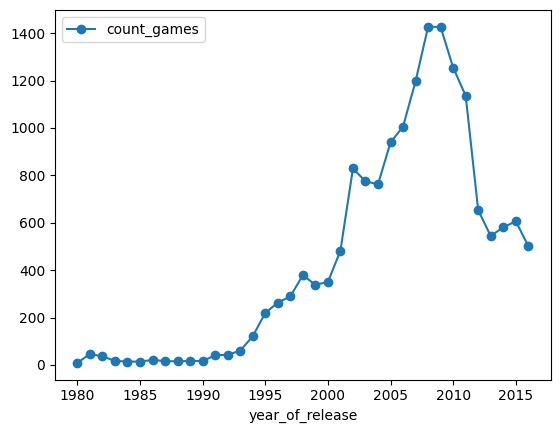

In [39]:
years.plot(x='year_of_release',marker='o')
years

<b><FONT COLOR="green">Conforme al paso del tiempo desde los primeros lanzamientos se han incrementado el numero de juegos en total por año llegando a su maximo en el año 2008	 con 1427 lanzamientos y bajando despues de este año</b></FONT>

<h3>Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. </h3>
Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


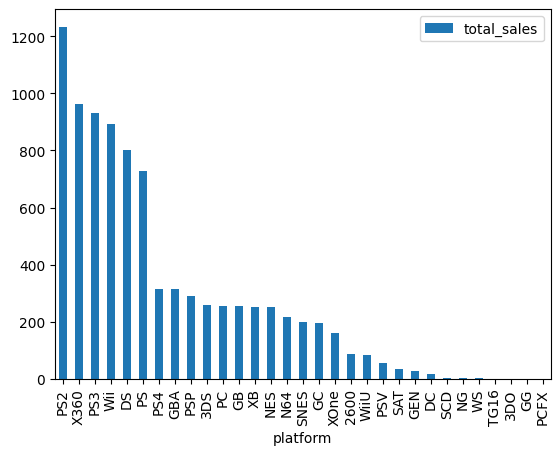

In [40]:
#(df.sort_values(by='total_sales',ascending=False)).groupby(['platform'])
sales_plat=df.groupby(['platform']).sum().sort_values(by='total_sales',ascending=False)
sales_plat=sales_plat.drop(columns=['year_of_release', 'na_sales','eu_sales','jp_sales','other_sales'])
sales_plat.plot(kind="bar")
platforms=sales_plat.reset_index()
platforms=platforms['platform']
print(sales_plat)

   <b><FONT COLOR="green">Se elegirán las primeras 10 plataformas en liderazgo de ventas de acuerdo a lo mostrado anteriormente las cuales son las siguientes :PS2, X360,PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS           </b></FONT>

      platform  year_of_release  total_sales
0          Wii             2006        82.54
2          Wii             2008        35.52
3          Wii             2009        32.77
6           DS             2006        29.80
7          Wii             2006        28.91
...        ...              ...          ...
16708      GBA             2002         0.01
16709      PS2             2008         0.00
16710      PS3             2016         0.01
16711     X360             2006         0.01
16713      GBA             2003         0.01

[12170 rows x 3 columns]


<AxesSubplot:xlabel='year_of_release'>

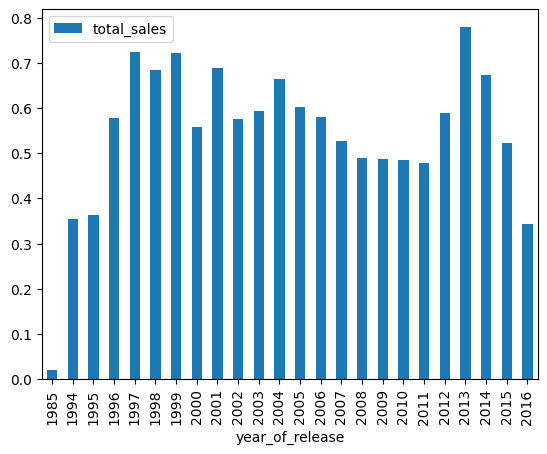

In [41]:
platform_y_s_filter=df[((df['platform']=="PS2") | (df['platform']=="X360") | (df['platform']=="PS3")| (df['platform']=="Wii")| (df['platform']=="DS")| (df['platform']=="PS") | (df['platform']=="PS4")|(df['platform']=="GBA")|(df['platform']=="PSP")| (df['platform']=="3DS"))].drop(columns=['name','genre','user_score', 'na_sales','eu_sales','jp_sales','other_sales','critic_score','rating'])
print(platform_y_s_filter)
platform_y_s_filter.groupby(["year_of_release"]).mean().plot(kind="bar")


In [42]:
#Wii_filter=platform_y_s_filter[(platform_y_s_filter['platform']=='Wii') ]#& (platform_y_s_filter['year_of_release']>0)]
#Wii_filter.groupby(['year_of_release']).mean().plot(title ="Wii", kind="bar")


<h4>Busca las plataformas que solían ser populares pero que ahora no tienen ventas </h4>

In [43]:
platform_y_s_filter.groupby("year_of_release")["platform"].unique()

year_of_release
1985                                   [DS]
1994                                   [PS]
1995                                   [PS]
1996                                   [PS]
1997                                   [PS]
1998                                   [PS]
1999                                   [PS]
2000                         [PS, PS2, GBA]
2001                         [PS2, GBA, PS]
2002                         [PS2, GBA, PS]
2003                         [PS2, GBA, PS]
2004                    [PS2, GBA, DS, PSP]
2005              [DS, PSP, PS2, GBA, X360]
2006    [Wii, DS, X360, PS2, PSP, PS3, GBA]
2007    [Wii, X360, DS, PS3, PS2, PSP, GBA]
2008         [Wii, X360, PS3, DS, PSP, PS2]
2009         [Wii, X360, DS, PS3, PSP, PS2]
2010         [X360, DS, PS3, Wii, PSP, PS2]
2011    [X360, PS3, 3DS, Wii, DS, PSP, PS2]
2012         [PS3, X360, 3DS, DS, Wii, PSP]
2013    [PS3, X360, 3DS, PS4, Wii, DS, PSP]
2014        [PS4, 3DS, PS3, X360, Wii, PSP]
2015        [PS4

   <b><FONT COLOR="green">En el caso de DS tiene un error en un juego ya que no se lanzo en 1985, se procede a corregir el error</b></FONT>

In [44]:
df.loc[((df["name"]=='Strongest Tokyo University Shogi DS' )& (df["year_of_release"]==1985)),'year_of_release']=2010
df[df["name"]=='Strongest Tokyo University Shogi DS' ]
platform_y_s_filter=df[((df['platform']=="PS2") | (df['platform']=="X360") | (df['platform']=="PS3")| (df['platform']=="Wii")| (df['platform']=="DS")| (df['platform']=="PS") | (df['platform']=="PS4")|(df['platform']=="GBA")|(df['platform']=="PSP")| (df['platform']=="3DS"))].drop(columns=['name','genre','user_score', 'na_sales','eu_sales','jp_sales','other_sales','critic_score','rating'])

In [45]:
name_console=platform_y_s_filter['platform'].unique()
filter_plat=platform_y_s_filter.groupby("year_of_release")["platform"].unique()
#print(filter_plat)
platform_y_filter=platform_y_s_filter.drop(columns="total_sales")
max_year=[]
min_year=[]
years_console=pd.DataFrame([])
years_console['last_r']=[]
years_console['first_r']=[]
for i in range(len(name_console)):
    years_console['platform']=name_console.tolist()
    max_year.append(platform_y_filter[platform_y_filter['platform']==name_console[i]].groupby("platform")["year_of_release"].max())
    years_console['last_r'][i]=int(max_year[i][0])
    min_year.append(platform_y_filter[platform_y_filter['platform']==name_console[i]].groupby("platform")["year_of_release"].min())
    years_console['first_r'][i]=int(min_year[i][0])
years_console
years_console=years_console.reindex(['platform', 'first_r', 'last_r'], axis=1)
years_console['last_r']=years_console['last_r'].astype(int)
years_console['first_r']=years_console['first_r'].astype(int)

/tmp/ipykernel_32/2946369220.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_console['last_r'][i]=int(max_year[i][0])
/tmp/ipykernel_32/2946369220.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_console['first_r'][i]=int(min_year[i][0])


  platform  first_r  last_r  time
6      PS4     2013    2016     3
7      3DS     2011    2016     5
5      GBA     2000    2007     7
1       DS     2004    2013     9
8       PS     1994    2003     9
0      Wii     2006    2016    10
3      PS3     2006    2016    10
2     X360     2005    2016    11
4      PS2     2000    2011    11
9      PSP     2004    2015    11


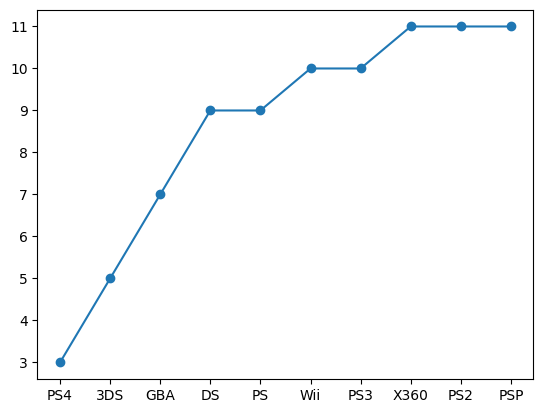

In [46]:
years_console['time']=years_console['last_r']-years_console['first_r']
years_console=years_console.sort_values(by='time')
print(years_console)
plt.plot(years_console['platform'],years_console['time'],'-o')

   <b><FONT COLOR="green">Las plataformas que ya no tienen ventas de acuerdo a las seleccionadas son : PS, PS2, PS3, GBA, DS, PSP </b></FONT>

<h4>¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?</h4>


las consolas tardan en aparecer : 3.1666666666666665 años
las consolas antiguas tardan en el mercado aproximadamente : 8.6 años


<BarContainer object of 2 artists>

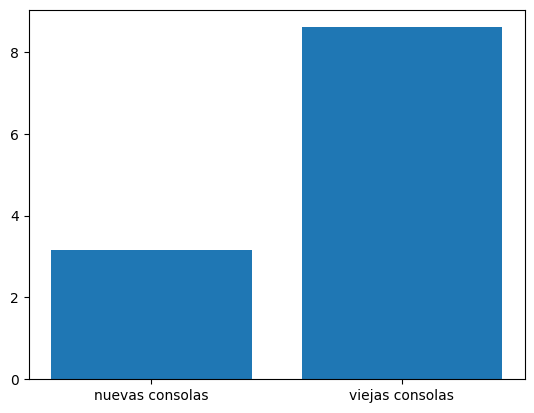

In [47]:
years_console.sort_values(by='first_r',inplace=True)
y1=years_console['first_r'].unique()
y2=np.diff(y1)
y2_mean=y2.mean()
old_con=years_console['time'].mean()
print(f"las consolas tardan en aparecer : {y2_mean} años")
print(f"las consolas antiguas tardan en el mercado aproximadamente : {old_con} años")
plt.bar(["nuevas consolas","viejas consolas"],[y2_mean,old_con])

    

<h3>Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.</h3>


   <b><FONT COLOR="green">Ya que las consolas tardan en aparecer un aproximado de cada 3 años y las consolas duran aproximadamente intervalos de 8.6 años en el mercado , no se puede tomar mas de 3 años por el cambio de tendencia y su rapido crecimiento e innovacion, se determina que el periodo debe de ser del 2013 al 2016  </b></FONT>

<h3>Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
</h3>



In [48]:
df_per=df[df['year_of_release']>2012]
df_per.sort_values('total_sales',ascending=False)
df_per.drop(columns=['name','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'],inplace=True)


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
df_per.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

   <b><FONT COLOR="green">Las plataformas lideres en ventas del año 2013 en adelante son: PS4,PS3,XOne, 3DS,X360  </b></FONT>

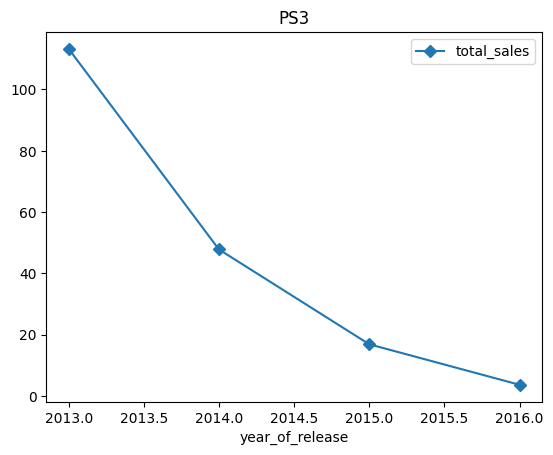

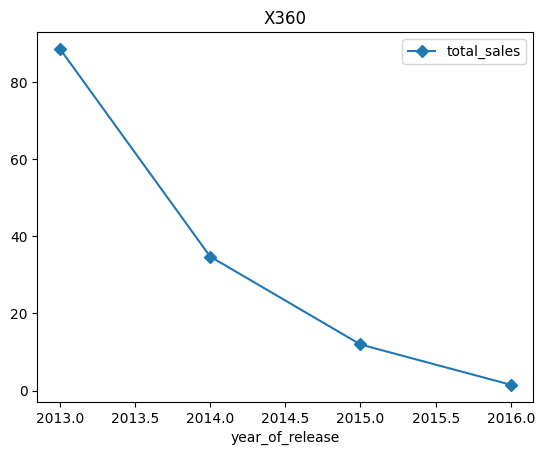

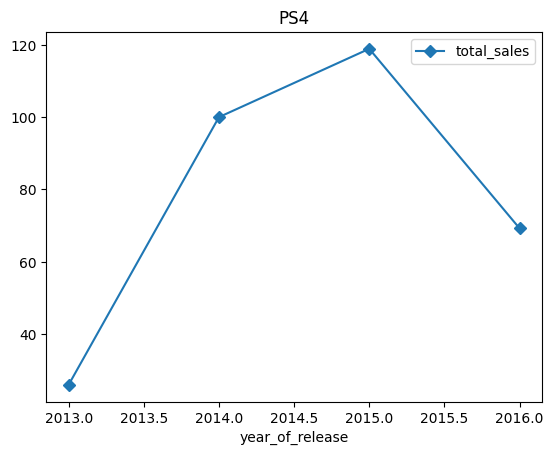

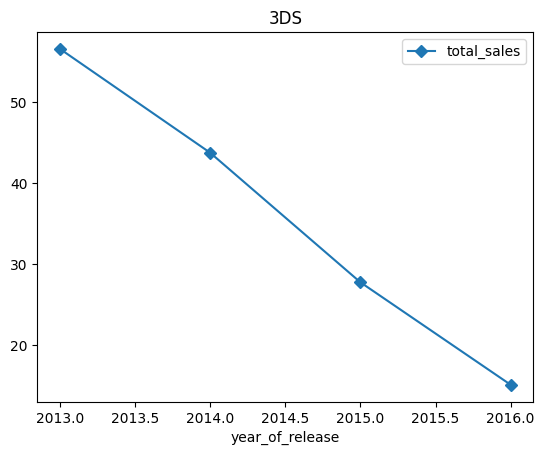

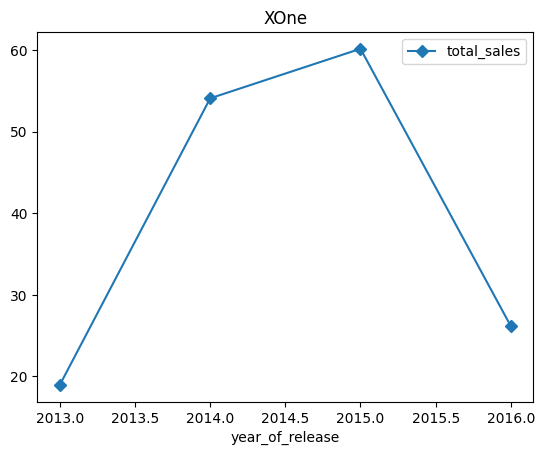

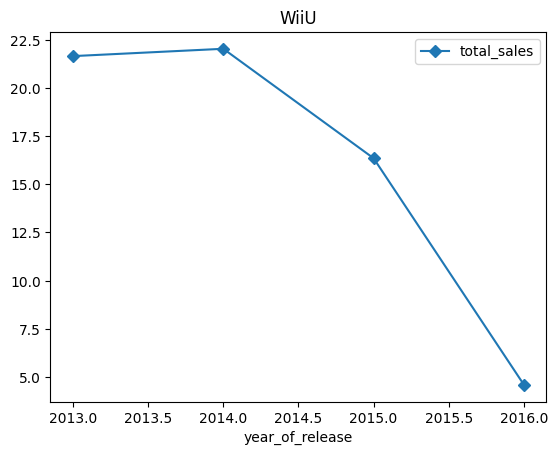

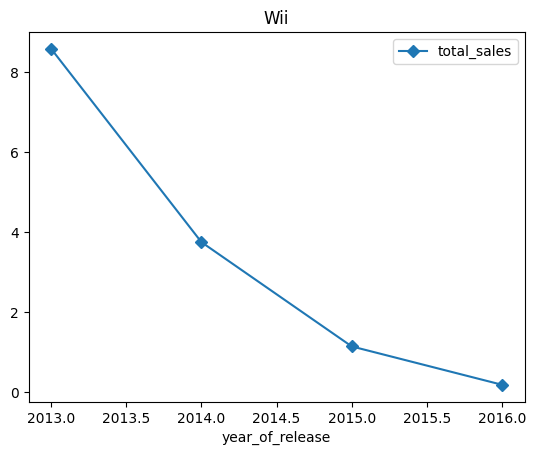

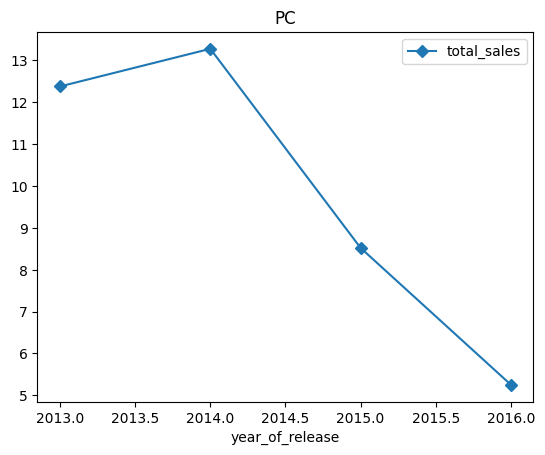

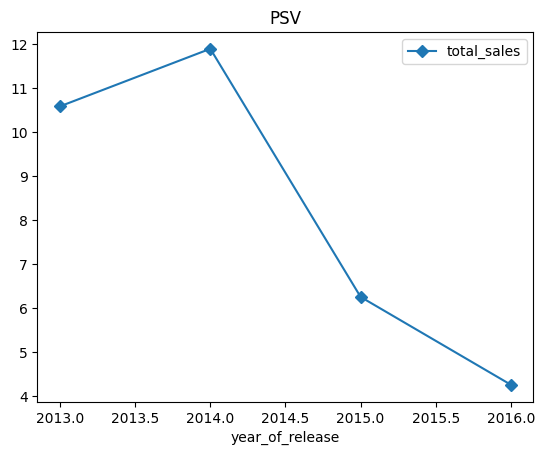

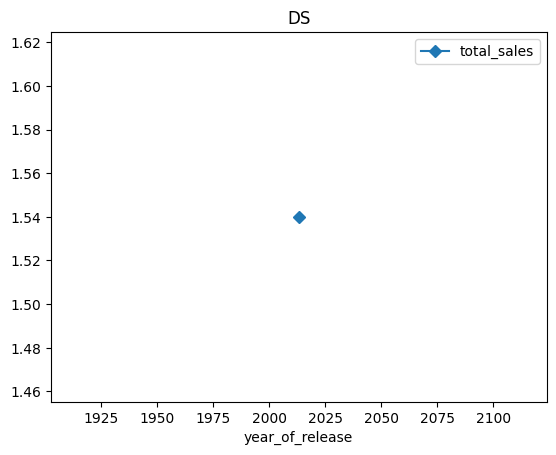

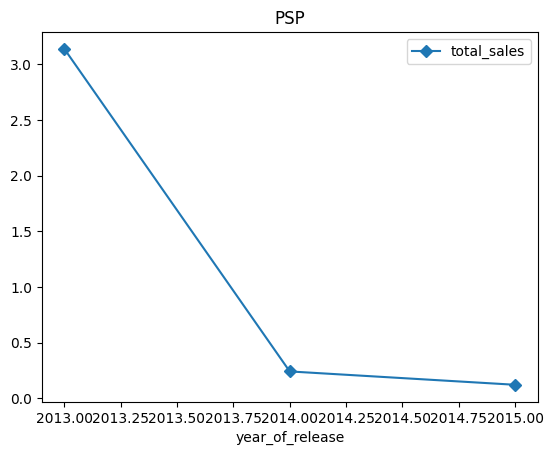

In [50]:
df_per.sort_values(by='platform')
platf_n=df_per['platform'].unique()
plat=[]
for n in range(len(platf_n)):
    plat.append(pd.DataFrame(df_per[df_per['platform']==platf_n[n]].groupby("year_of_release")["total_sales"].sum()))
    plat[n].plot(kind="line",title=platf_n[n],marker='D')



   <b><FONT COLOR="green">En el caso de las platformas las cuales se reducen serían: Wii, X360, PS3, DS, 3DS, PC,WiiU, PSP, PS2,PSV, XB, DC,... Y en el caso de las que crecen serian solo : PS4 y XOne </b></FONT>
   

<h3>Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.</h3>


In [51]:
glo_sales=df.drop(columns=['genre','na_sales','eu_sales','jp_sales','other_sales','rating','critic_score','user_score'])
glo_sales=glo_sales=glo_sales[glo_sales['year_of_release']>2012]
glo_sales

,name,platform,year_of_release,total_sales
16,Grand Theft Auto V,PS3,2013,21.05
23,Grand Theft Auto V,X360,2013,16.27
31,Call of Duty: Black Ops 3,PS4,2015,14.63
33,Pokemon X/Pokemon Y,3DS,2013,14.60
42,Grand Theft Auto V,PS4,2014,12.62
...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,0.01
16707,Aiyoku no Eustia,PSV,2014,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,0.01
16712,Haitaka no Psychedelica,PSV,2016,0.01


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4fec774f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4fec784670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4fec774c10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4fec784d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4fec78e0d0>,
 'means': []}

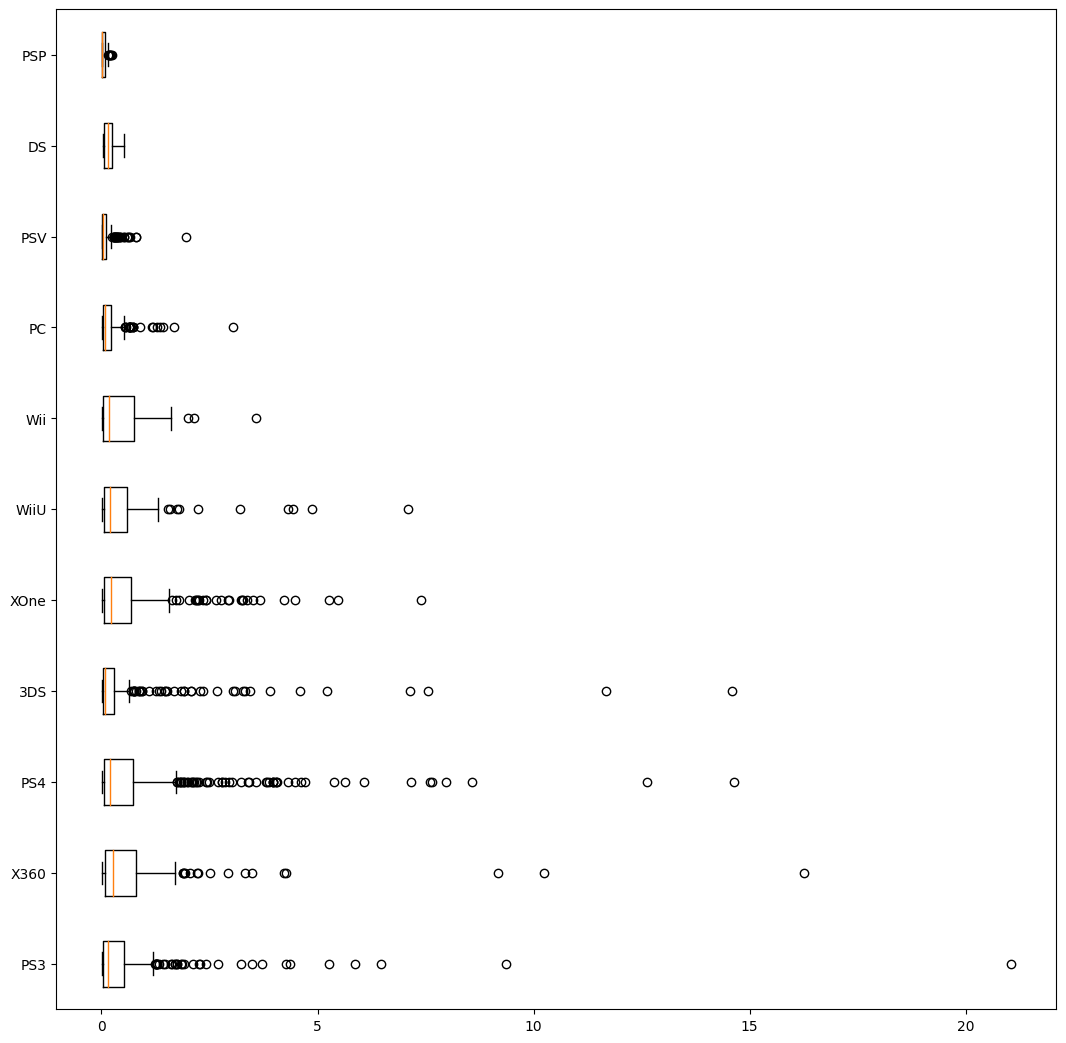

In [52]:
platform_name=glo_sales['platform'].unique().tolist()
sales_gral=[]
for i in range(len(platform_name)):
    sales_gral.append(glo_sales[glo_sales['platform']==platform_name[i]]['total_sales'])
fig = plt.figure(figsize =(10, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(sales_gral,labels=platform_name,vert=False)

<b><FONT COLOR="green">De las plataformas que tienen un menor promedio de ventas son: PSP, DS, PSV, 3DS, y PC, mientras las restantes: PS3, PS4, XOne, X360,WII y WIIU, Sin embargo podemos observar que deacuerdo al diagrama hay outliners como por ejemplo del PS3 seguido de X360 los cuales han vendido de manera mas significativa que las demas consolas en promedio.  </b></FONT>

In [53]:
glo_sales.sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,total_sales
16,Grand Theft Auto V,PS3,2013,21.05
23,Grand Theft Auto V,X360,2013,16.27
31,Call of Duty: Black Ops 3,PS4,2015,14.63
33,Pokemon X/Pokemon Y,3DS,2013,14.60
42,Grand Theft Auto V,PS4,2014,12.62
...,...,...,...,...
16264,Worms: WMD,XOne,2016,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016,0.01
16270,Hyakka Yakou,PSV,2015,0.01
16273,Doki-Doki Universe,PSV,2013,0.01


<h3>Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones</h3>


<b><FONT COLOR="green">Se elige PS3</b></FONT>

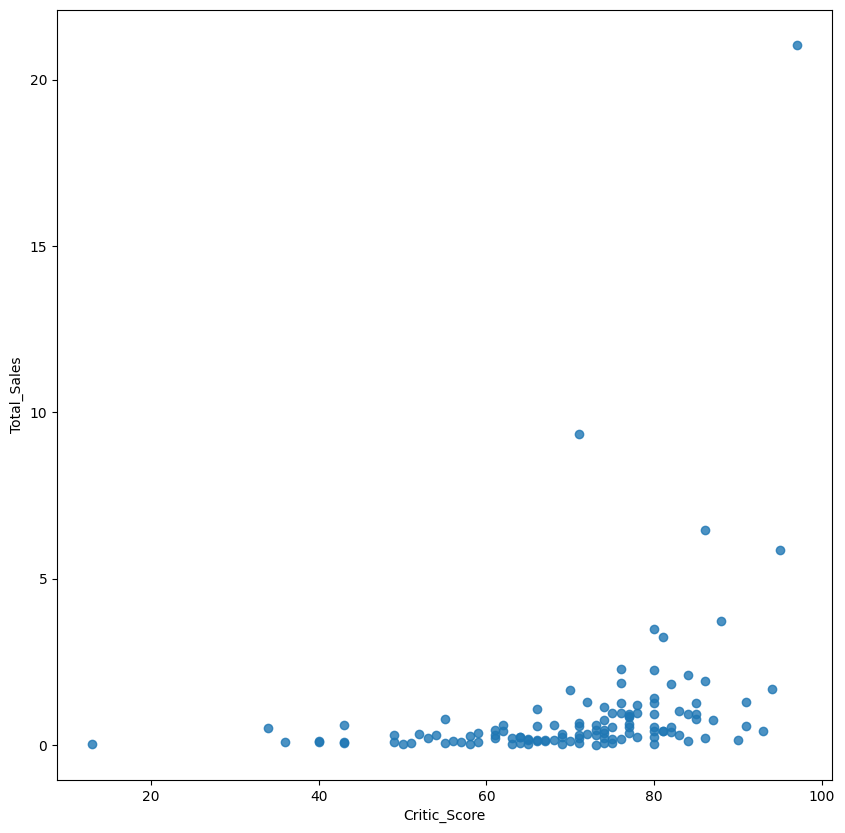

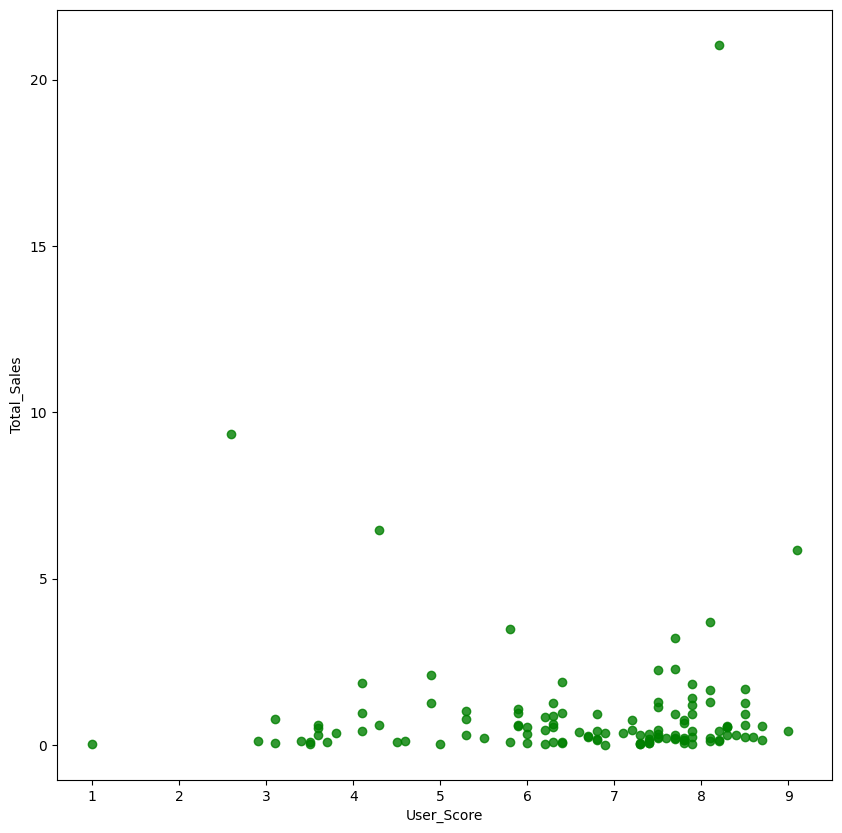

In [55]:
df_score=df.drop(columns=['name','genre','na_sales','eu_sales','jp_sales','other_sales','rating'])
#df_score.drop([(df_score['critic_score']=='') | (df_score['user_score']=='') ])
df_score.drop(df_score[(df_score['critic_score']=='') | (df_score['user_score']=='')].index, inplace=True)
df_score_critic=df_score.drop(columns=['user_score'])
df_score_user=df_score.drop(columns=['critic_score'])
ps3_corr_c=df_score_critic[df_score_critic['platform']=="PS3"]
ps3_corr_c=ps3_corr_c[ps3_corr_c['year_of_release']>2012]
ps3_corr_c=ps3_corr_c.drop(columns=['platform'])
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ps3_corr_c['critic_score']=ps3_corr_c['critic_score'].astype(float)
ax.scatter(x=ps3_corr_c['critic_score'], y=ps3_corr_c['total_sales'],alpha= 0.8)
ax.set_xlabel('Critic_Score')
ax.set_ylabel('Total_Sales')
ps3_corr_u=df_score_user[df_score_user['platform']=="PS3"]
ps3_corr_u=ps3_corr_u[ps3_corr_u['year_of_release']>2012]
ps3_corr_u=ps3_corr_u.drop(columns=['platform'])
ps3_corr_u=ps3_corr_u.sort_values(by='user_score')
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ps3_corr_u['user_score']=ps3_corr_u['user_score'].astype(float)
ax.scatter(x=ps3_corr_u['user_score'], y=ps3_corr_u['total_sales'],alpha= 0.8,c='green')
ax.set_xlabel('User_Score')
ax.set_ylabel('Total_Sales')
plt.show()


In [56]:
print(f"la correlacion con base a la calificacion emitida por los criticos es : {(ps3_corr_c['critic_score'].corr(ps3_corr_c['total_sales']))} ")                                                                                                           
print(f"la correlacion con base a la calificacion emitida por los usuarios es : {(ps3_corr_u['user_score'].corr(ps3_corr_u['total_sales']))} ")


la correlacion con base a la calificacion emitida por los criticos es : 0.33380663565061736 
la correlacion con base a la calificacion emitida por los usuarios es : 0.0226909432711241 


<b><FONT COLOR="green">En el caso de la calificacion emitida por criticos está moderadamente relacionada con el comportamiento de las ventas globales, y la calificacion emitida por los usarios es muy cercano a 0 pero positiva lo cual indicaria que no hay una relacion aparente entre la calificacion de usuarios y las ventas en los juegos. </b></FONT>

<h3>Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas</h3>


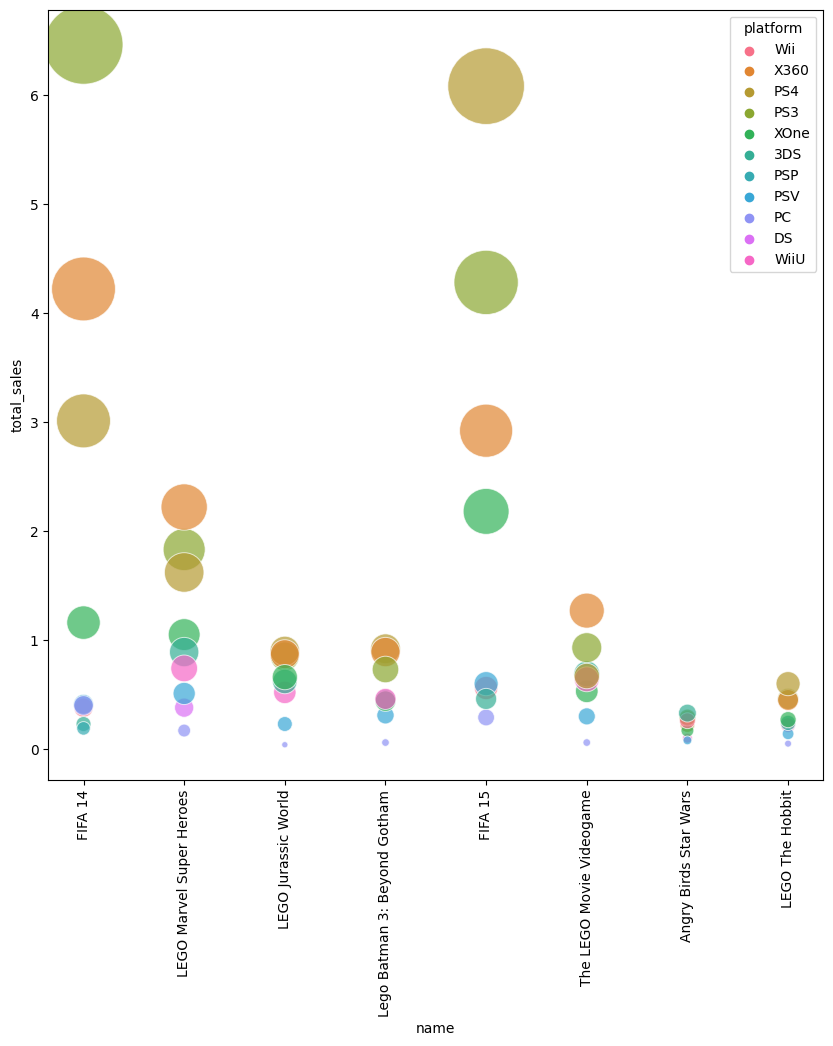

                              name platform  year_of_release  total_sales
126                        FIFA 14      PS3             2013         6.46
143                        FIFA 15      PS4             2014         6.08
264                        FIFA 15      PS3             2014         4.28
271                        FIFA 14     X360             2013         4.22
469                        FIFA 14      PS4             2013         3.01
494                        FIFA 15     X360             2014         2.92
730       LEGO Marvel Super Heroes     X360             2013         2.22
754                        FIFA 15     XOne             2014         2.18
945       LEGO Marvel Super Heroes      PS3             2013         1.83
1139      LEGO Marvel Super Heroes      PS4             2013         1.62
1548      The LEGO Movie Videogame     X360             2014         1.27
1753                       FIFA 14     XOne             2013         1.16
1959      LEGO Marvel Super Heroes    

In [57]:
glo_sales=glo_sales.sort_values(by='name')
games_dup=[]
games_dup=(glo_sales[glo_sales['name'].duplicated(keep=False)])
#games_dup
g=games_dup['name'].value_counts().head(8)
g=pd.DataFrame(g).reset_index()
g=g.rename(columns={'index':'name','name':'num_plat'})
g=g.drop(columns=['num_plat'])
g=g['name'].tolist()
games_new=[]
for k in range(len(g)):
        games_new.append(pd.DataFrame(games_dup[games_dup['name']==g[k]]))

games_new=games_new[0].append(games_new[1:9])
plt.subplots(figsize=[10,10])
sns.scatterplot(data=games_new,x=games_new['name'],y=games_new['total_sales'],hue=games_new['platform'],alpha=0.7, s=games_new['total_sales']*500)
plt.xticks(rotation=90)
plt.show()
#fig2, ax2=plt.subplots(figsize=[10,10])
#ax2.plot(games_new['name'],games_new['total_sales'],'o',label=games_new['platform'])

#ax2.scatter(x=games_new['platform'],y=games_new['total_sales'],alpha=0.5,label=games_new['name'])
print(games_new.sort_values(by='total_sales',ascending=False).head(60))

<b><FONT COLOR="green">Dependiendo de la plataforma pueden variar los precios y las ventas para los juegos mas vendidos a partir del 2013, estando en primer lugar FIFA 14 para PS3, seguido de FIFA 15 para PS4, aun así estos mismo juegos lideran las ventas para otra plataformas como X360 yXONE, así mismo estos mismo juegos cambian demasiado en sus ventas en el caso de consolas como PSV, Wii, y PC en estos casos, siendo rebasados por otros juegos mayormente en plataformas populares como XOne, PS4, PS3 y X360 podemos concluir que dependiendo de la consola se alcanzan diferentes densidades de ventas, quedando como lideres las mas recientes y mas compatibles con el estilo de juego.    </b></FONT>

<h3>Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?</h3>


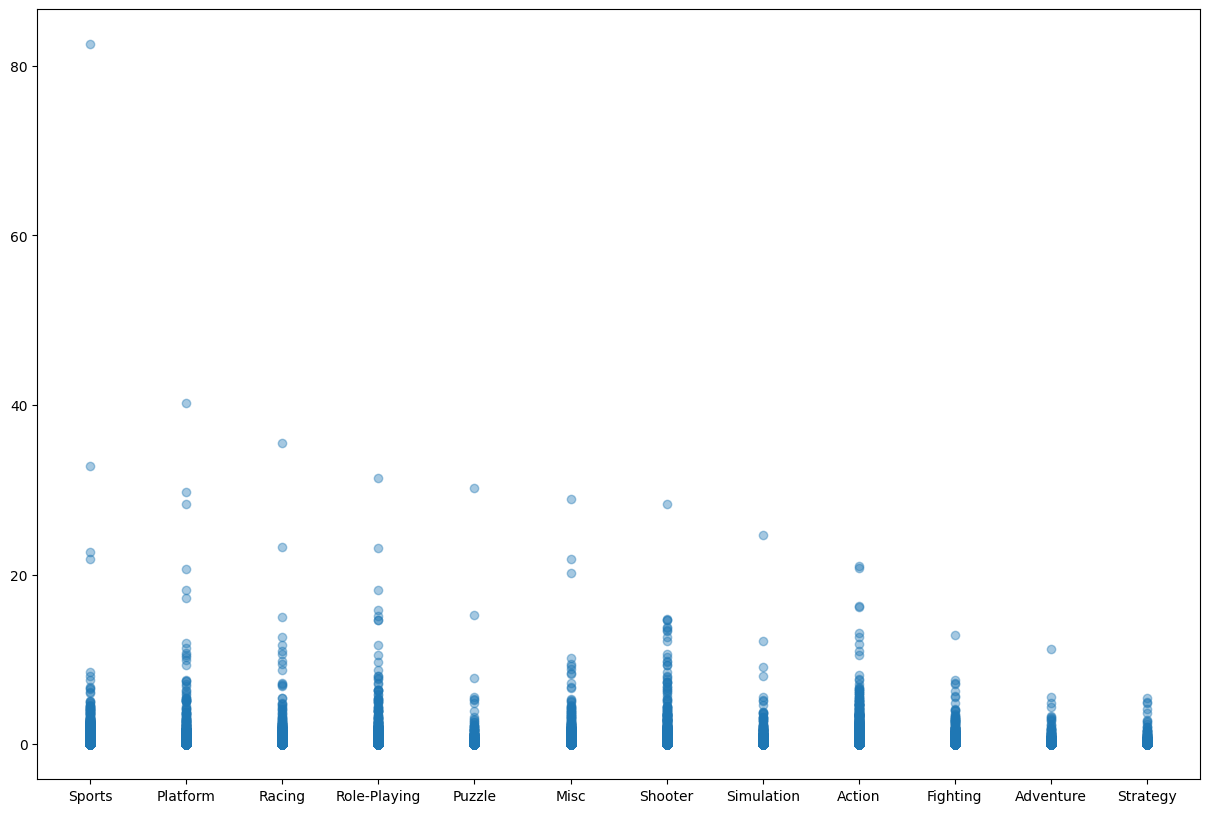

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64


genre
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64

In [58]:
df_genre=df.drop(columns=['year_of_release','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating','name','platform'])
df_genre=df_genre.sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(15,10))
plt.scatter(x=df_genre['genre'],y=df_genre['total_sales'],alpha=0.4)
plt.show()
print(df_genre.groupby("genre")["total_sales"].sum().sort_values(ascending=False))
df_genre_mean=df_genre.groupby("genre")["total_sales"].mean().sort_values(ascending=False)
df_genre_mean


<b><FONT COLOR="green"> A pesar que a simple vista por la suma de cada genero se puede deducir que Action , Sports, y Shooter son los mas vendidos en el caso de que si se hace el promedio de cada genero se puede observar que el genero mas exitoso es el de Platform, seguido por Shooter y Role-Playing , ya que en algunos casos dependiendo de que si el juego es muy exitoso se puede disparar el la suma total de ventas en el genero, pero por el promedio podemos tener la certeza que el genero de Platform es el mas vendido y popular, por otra parte podemos concluir que los de Strategy , Puzzle y Adventure son los menos populares ya que por su modo de juego no son los mas comprados en general.  </b></FONT>

<h2>Paso 4. Crea un perfil de usuario para cada región Para cada región (NA, UE, JP) determina:</h2>


In [59]:
df_na=df[['name','platform','genre','na_sales']]
df_eu=df[['name','platform','genre','eu_sales']]
df_jp=df[['name','platform','genre','jp_sales']]

#df_na=df.drop(columns=['year_of_release','eu_sales','jp_sales','other_sales','critic_score','user_score','rating','total_sales'])
#df_eu=df.drop(columns=['year_of_release','na_sales','jp_sales','other_sales','critic_score','user_score','rating','total_sales'])
#df_jp=df.drop(columns=['year_of_release','na_sales','eu_sales','other_sales','critic_score','user_score','rating','total_sales'])
#df_na

<h3>Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.</h3>


platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64


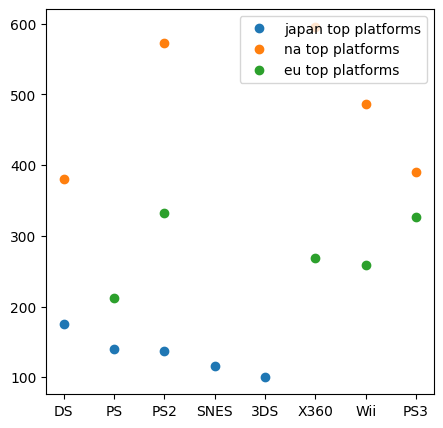

In [60]:
df_jp=df_jp.sort_values(by='jp_sales',ascending=False)
df_jp_5p=df_jp.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)
print(df_jp_5p)
df_na.sort_values(by='na_sales',ascending=False)
df_na_5p=df_na.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
print(df_na_5p)
df_eu.sort_values(by='eu_sales',ascending=False)
df_eu_5p=df_eu.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
print(df_eu_5p)
fig3, ax3=plt.subplots(figsize=(5,5))
ax3.plot(df_jp_5p,'o',label="japan top platforms")
ax3.plot(df_na_5p,'o',label="na top platforms")
ax3.plot(df_eu_5p,'o',label="eu top platforms")
ax3.legend()
plt.show()


<b><FONT COLOR="green">Se puede notar que dentro de las  primeras plataformas de para cada pais , hay una diferencia muy grande en ventas para cada una de ellas , por ejemplo en japon la mas vendida es el DS , para norte america es el X360 y para europa es el PS2  , sin embargo la region la cual tiene mas consumidores es norte america , seguido por europa y por ultimo japon. </b></FONT>

<h3>Los cinco géneros principales. Explica la diferencia.</h3>



In [61]:
print(df_jp.groupby("genre")['jp_sales'].sum().sort_values(ascending=False).head(5))
print(df_na.groupby("genre")['na_sales'].sum().sort_values(ascending=False).head(5))
print(df_eu.groupby("genre")['eu_sales'].sum().sort_values(ascending=False).head(5))

genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


<b><FONT COLOR="green">Entre las regiones de la union europea y norte america los generos mas populares son muy similares entre ellos a excepcion de para norte america con Platform y Racing para la unión europea, a diferencia de los generos populares en japon el cual el mas popular es Role-Playing, seguido por Action, Sports,Platform y Misc, Esto se puede deber a las diferencias culturales y distribucion de la poblacion.  </b></FONT>

<h3>Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.</h3>


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   platform rating  jp_sales
5        DS      E     60.20
20      PS2      T     43.05
0       Wii      E     40.09
16      PS3      T     25.47
15      PS3      M     24.12
..      ...    ...       ...
22      PS2     EC      0.00
42       PC      T      0.00
43       PC   E10+      0.00
46       PC     RP      0.00
59       GC     EC      0.00

[75 rows x 3 columns]


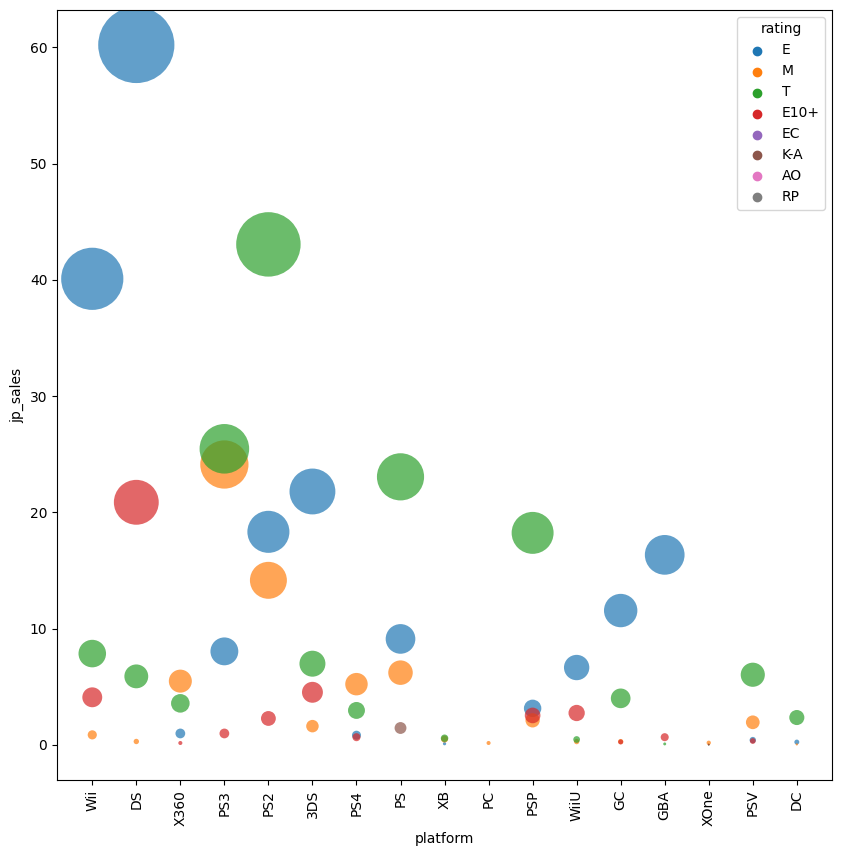

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   platform rating  na_sales
0       Wii      E    274.90
11     X360      M    270.06
5        DS      E    224.95
18      PS2      E    198.44
20      PS2      T    181.68
..      ...    ...       ...
22      PS2     EC      0.12
59       GC     EC      0.09
45       PC     EC      0.09
73       DC      M      0.00
46       PC     RP      0.00

[75 rows x 3 columns]


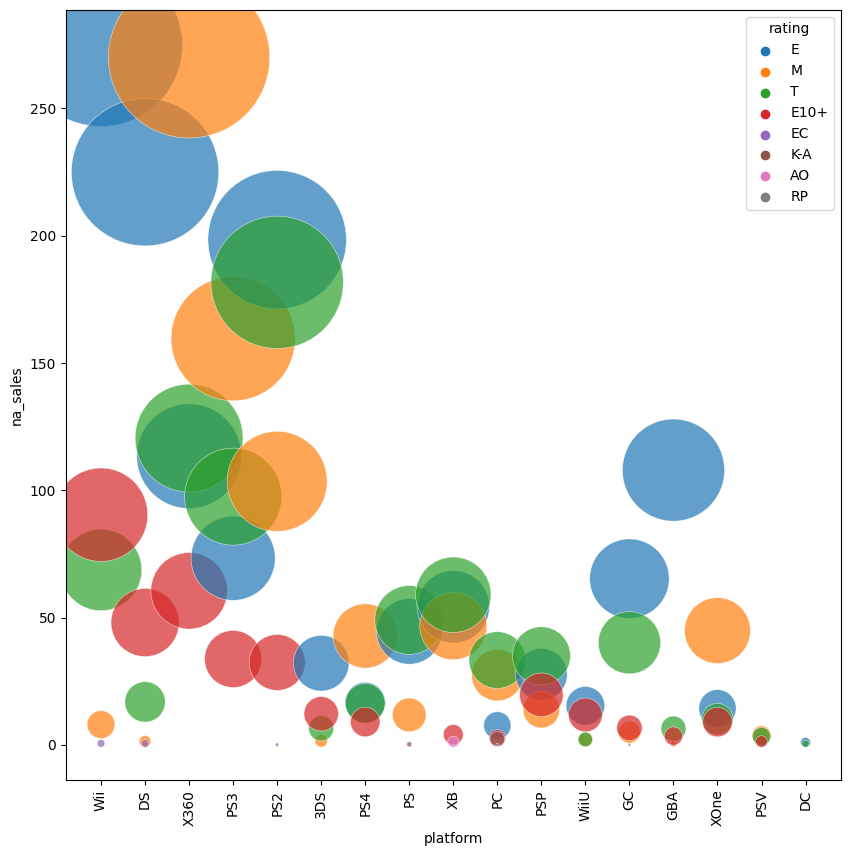

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


   platform rating  eu_sales
0       Wii      E    151.61
15      PS3      M    135.23
11     X360      M    122.14
5        DS      E    112.12
18      PS2      E    111.25
..      ...    ...       ...
59       GC     EC      0.02
4       Wii     EC      0.00
9        DS     EC      0.00
45       PC     EC      0.00
73       DC      M      0.00

[75 rows x 3 columns]


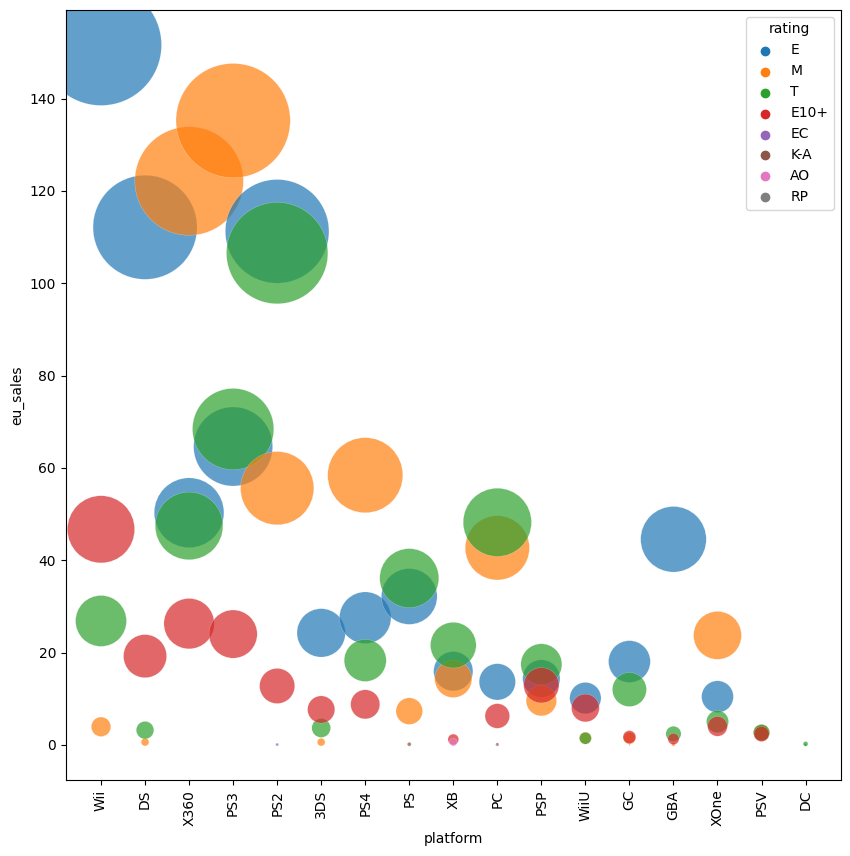

In [166]:

#df_jp_r=df.drop(columns=['name','genre','year_of_release','eu_sales','na_sales','other_sales','critic_score','user_score','total_sales'])
df_jp_r=df[['platform','jp_sales','rating']]
df_jp_r.drop(df_jp_r[df_jp_r['rating']==''].index, inplace=True)
#df_jp_r.sort_values(by='jp_sales',ascending=False)
jp_platform=df_jp_r['platform'].unique().tolist()
jp_rating=df_jp_r['rating'].unique().tolist()
jp_rat_plat=[]
for h in range(len(jp_platform)):
    for g in range(len(jp_rating)):
        jp_rat_plat.append(df_jp_r[(df_jp_r['platform']==jp_platform[h]) & (df_jp_r['rating']==jp_rating[g])].groupby(['platform','rating']).sum())
jp_rat_plat=jp_rat_plat[0].append(jp_rat_plat[1:])
jp_rat_plat=jp_rat_plat.reset_index()
print(jp_rat_plat.sort_values(by='jp_sales',ascending=False))
plt.subplots(figsize=[10,10])
sns.scatterplot(data=jp_rat_plat,x=jp_rat_plat['platform'],y=jp_rat_plat['jp_sales'],hue=jp_rat_plat['rating'],alpha=0.7,s=jp_rat_plat['jp_sales']*50)
plt.xticks(rotation=90)
plt.show()
#df_na_r=df.drop(columns=['name','genre','year_of_release','eu_sales','jp_sales','other_sales','critic_score','user_score','total_sales'])
df_na_r=df[['platform','na_sales','rating']]
df_na_r.drop(df_na_r[df_na_r['rating']==''].index, inplace=True)
na_platform=df_na_r['platform'].unique().tolist()
na_rating=df_na_r['rating'].unique().tolist()
na_rat_plat=[]
for n in range(len(na_platform)):
    for a in range(len(na_rating)):
        na_rat_plat.append(df_na_r[(df_na_r['platform']==na_platform[n]) & (df_na_r['rating']==na_rating[a])].groupby(['platform','rating']).sum())
na_rat_plat=na_rat_plat[0].append(na_rat_plat[1:])
na_rat_plat=na_rat_plat.reset_index()
print(na_rat_plat.sort_values(by='na_sales',ascending=False))
plt.subplots(figsize=[10,10])
sns.scatterplot(data=na_rat_plat,x=na_rat_plat['platform'],y=na_rat_plat['na_sales'],hue=na_rat_plat['rating'],alpha=0.7,s=na_rat_plat['na_sales']*50)
plt.xticks(rotation=90)
plt.show()
#df_na_r.sort_values(by='na_sales',ascending=False)
#df_na_r=df_na_r.groupby('rating')['na_sales'].sum()
#print(df_na_r)
#df_eu_r=df.drop(columns=['name','genre','year_of_release','jp_sales','na_sales','other_sales','critic_score','user_score','total_sales'])
df_eu_r=df[['platform','eu_sales','rating']]
df_eu_r.drop(df_eu_r[df_eu_r['rating']==''].index, inplace=True)
eu_platform=df_eu_r['platform'].unique().tolist()
eu_rating=df_eu_r['rating'].unique().tolist()
eu_rat_plat=[]
for e in range(len(eu_platform)):
    for u in range(len(eu_rating)):
        eu_rat_plat.append(df_eu_r[(df_eu_r['platform']==eu_platform[e]) & (df_eu_r['rating']==eu_rating[u])].groupby(['platform','rating']).sum())
eu_rat_plat=eu_rat_plat[0].append(eu_rat_plat[1:])
eu_rat_plat=eu_rat_plat.reset_index()
print(eu_rat_plat.sort_values(by='eu_sales',ascending=False))
plt.subplots(figsize=[10,10])
sns.scatterplot(data=eu_rat_plat,x=eu_rat_plat['platform'],y=eu_rat_plat['eu_sales'],hue=eu_rat_plat['rating'],alpha=0.7,s=eu_rat_plat['eu_sales']*50)
plt.xticks(rotation=90)
plt.show()
#df_eu_r.sort_values(by='eu_sales',ascending=False)
#df_eu_r=df_eu_r.groupby('rating')['eu_sales'].sum()
#print(df_eu_r)
#fig4, ax4=plt.subplots(figsize=(5,5))
#ax4.plot(df_jp_r,'o',label="japan rating")
#ax4.plot(df_na_r,'o',label="na rating")
#ax4.plot(df_eu_r,'o',label="eu rating")
#ax4.legend()
#plt.show()


<b><FONT COLOR="green">Se puede observar que en cada region hay diferentes comportamientos dependiendo de la clasificacion de juegos, así como la consola con la cual se utilice segun la clasificación tomando de referencia las ventas mayores segun su clasificacion :

<b><FONT COLOR="blue"> JAPON se tiene el DS clas:E,  PS2 clas: T, Wii clas:E, PS3 clas:T,PS3 clas:M.
 NORTE AMERICA: Wii clas: E, X360 clas:M, DS clas:E, PS2 clas:E, PS2 clas: T 
 EUROPA : Wii clas:E, PS3 clas:M, X360 clas:M, DS clas:E, PS2 clas:E.<b></FONT>
 Como se puede ver la clasificacion no varia tanto en las ventas de los juegos, cambiando de manera no tan significativa las ventas en cada region ya que como se puede observar las tres regiones comparten DS clas:E, Wii clas:E, dentro de sus primeros lugares de ventas, sin embargo hay mas compatibilidad entre las regiones de NORTE AMERICA y EUROPA. </b></FONT>


<h2>Paso 5. Prueba las siguientes hipótesis:</h2>


<h3>Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.</h3>



In [495]:
df_h=df.drop(columns=['rating','name','genre','year_of_release','eu_sales','na_sales','jp_sales','other_sales','critic_score','total_sales'])

df_h.drop(df_h[df_h['user_score']==''].index, inplace=True)
df_h_x=df_h[df_h['platform']=='XOne']
df_h_p=df_h[df_h['platform']=='PC']  
df_h_x['user_score']=df_h_x['user_score'].astype(float)
df_h_p['user_score']=df_h_p['user_score'].astype(float)

alpha = 0.05

results = st.ttest_ind(df_h_x['user_score'],df_h_p['user_score'], equal_var=False)

print('valor p: ', results.pvalue) # extrae el valor p )

if (results.pvalue < alpha):# compara el valor p con el umbral alpha
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  4.5385802963771835e-06
Rechazamos la hipótesis nula


/tmp/ipykernel_32/2061641939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_x['user_score']=df_h_x['user_score'].astype(float)
/tmp/ipykernel_32/2061641939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_p['user_score']=df_h_p['user_score'].astype(float)


<b><FONT COLOR="green"> Segun la prueba t SE RECHAZA la hipotesis la cual decia que las calificaciones de usuarios promedio enre Xbox One y PC son las mismas </b></FONT>

<h3>Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Establece tu mismo el valor de umbral alfa.</h3>


In [496]:
df_genre_h=df.drop(columns=['rating','name','platform','year_of_release','eu_sales','na_sales','jp_sales','other_sales','critic_score','total_sales'])
df_genre_h.drop(df_genre_h[df_genre_h['user_score']==''].index, inplace=True)
df_action=df_genre_h[df_genre_h['genre']=='Action']
df_sports=df_genre_h[df_genre_h['genre']=='Sports']
df_action['user_score']=df_action['user_score'].astype(float)
df_sports['user_score']=df_sports['user_score'].astype(float)
print(df_action)
print(df_sports)

alpha = 0.05 #umbral 5%


results = st.ttest_ind(df_action['user_score'],df_sports['user_score'], equal_var=False) #prueba t individual

print('valor p: ', results.pvalue) # extrae el valor p )

if (results.pvalue < alpha):# compara el valor p con el umbral alpha
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")

        genre  user_score
16     Action         8.2
17     Action         9.0
23     Action         8.1
24     Action         8.7
38     Action         8.5
...       ...         ...
16652  Action         8.5
16654  Action         5.1
16660  Action         6.7
16663  Action         2.4
16692  Action         7.6

[1796 rows x 2 columns]
        genre  user_score
0      Sports         8.0
3      Sports         8.0
13     Sports         7.7
15     Sports         7.4
77     Sports         4.3
...       ...         ...
16450  Sports         4.5
16518  Sports         1.4
16528  Sports         6.9
16546  Sports         9.5
16643  Sports         6.6

[1081 rows x 2 columns]
valor p:  0.07370217419278526
No podemos rechazar la hipótesis nula


/tmp/ipykernel_32/1218044800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action['user_score']=df_action['user_score'].astype(float)
/tmp/ipykernel_32/1218044800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sports['user_score']=df_sports['user_score'].astype(float)


<b><FONT COLOR="green"> Segun la prueba t SE RECHAZA la hipotesis Alternativa de la cual estabamos partiendo , la cual suponia que las calificaciones de usuarios promedio entre los generos Accion y deportes son diferentes, ya que segun la comprobacion nos marca que no hay una diferencia muy significativa entre los datos.</b></FONT>

<b>Explica:</b>

— Cómo formulaste las hipótesis nula y alternativa.

<b><FONT COLOR="green"> Se formula las hipotesis nula cuando no hay una diferencia entre las muestras o que el promedio es muy parecido , y por su parte la hipotesis alternativa se formula cuando hay diferencia significativa entre los datos. </b></FONT>

— Qué criterio utilizaste para probar las hipótesis y por qué

<b><FONT COLOR="green"> Partiendo de que se pedia un analisis de calificaciones promedio de usuarios, se hace con base al promedio y se usa la prueba t student individual para la comparacion de las 2 series de datos para cada una de las hipotesis ademas que la prueba t student nos ayuda a determinar si la media de una muestra es diferente a otra.  </b></FONT>

<h2>Paso 6. Escribe una conclusión general</h2>

<b><FONT COLOR="green"> Se ha comprobado que de acuerdo a el paso del tiempo hay plataformas las cuales han ido tomando importancia en el mercado tanto en general como en regiones como norteamerica , europa y japón , asi mismo que en algunos casos como es el sistema de clasificacion ESRB influye tambien en las ventas de los juegos, podemos observar que tambien hay periodos de vida de aproximadamente 8 años paralas plataformas y que se van fabricando cada vez mas juegos de las plataformas mas populares,   </b></FONT>